# Traffic Prediction using Artificial Neural Networks (ANN)

This notebook implements an Artificial Neural Network (ANN) to predict traffic situations based on various features such as time, day of the week, and vehicle counts.

## Import Libraries

In [175]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



## Load and Explore the Dataset

In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [177]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/ANN Project/TrafficTwoMonth.csv')
print(f"Dataset shape: {df.shape}")

Dataset shape: (5952, 9)


In [178]:
# Display the first few rows
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [179]:
## Problem Statement:
# City transportation departments need to evaluate various factors before making decisions about traffic management and infrastructure improvements.
# The objective of this project is to optimize the process of monitoring and analyzing urban traffic congestion by leveraging vehicle count data collected through computer vision.

# Features and Target:
# Target Variable – Traffic_Situation → Categorical variable. This is what we want to predict.
# Features – All other columns such as CarCount, BikeCount, BusCount, TruckCount, Total, Time, Date, Day of the week.


## Data description :

- The model detects four classes of vehicles: cars, bikes, buses, and trucks.
- The dataset is stored in a CSV file and includes additional columns such as time in hours, date, days of the week, and counts for each vehicle type (CarCount, BikeCount, BusCount, TruckCount).
- The "Total" column represents the total count of all vehicle types detected within a 15-minute duration.


In [180]:
# Display basic information about the dataset
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [181]:
# Check for missing values
data.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [182]:
# Check for duplicate values
duplicate = data.duplicated()
sum(duplicate)

0

In [183]:
# Display descriptive statistics
data.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [184]:
## Observations
# Date:
# - Ranges from 1 to 31, likely representing the day of the month.
# - Mean and median both are 16 → data is evenly distributed across the month.

# CarCount:
# - Range: 5 to 180 cars per 15-minute interval.
# - Mean = ~65.4, median = 62 → distribution is slightly right-skewed.

# BikeCount:
# - Range: 0 to 70 bikes detected.
# - Mean = ~12.2, median = 9 → distribution is slightly right-skewed.

# BusCount:
# - Range: 0 to 50 buses.
# - Mean = ~12.9, median = 10 → low bus volume compared to cars and distribution slightly right-skewed.

# TruckCount:
# - Range: 0 to 60 trucks.
# - Mean = ~18.6, median = 18 → distribution is normal.


# Total:
# - Total vehicles per 15-minute interval range from 21 to 279.
# - Mean = ~109.2, median = 104 → consistent with car-heavy traffic mix and the distribution is slightly right-skewed.

In [185]:
data.describe(include=['O'])

,Time,Day of the week,Traffic Situation
count,5952,5952,5952
unique,96,7,4
top,12:00:00 AM,Tuesday,normal
freq,62,960,3610


## Exploratory Data Analysis (EDA)

In [186]:
# Check the distribution of traffic situations
traffic_situation_counts = data['Traffic Situation'].value_counts()
print(traffic_situation_counts)

Traffic Situation
normal    3610
heavy     1137
low        834
high       371
Name: count, dtype: int64


In [187]:
# Convert time to datetime and extract hour
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p')
data['Hour'] = data['Time'].dt.hour

In [188]:
# Convert time to datetime and extract minutes
data['Minute'] = data['Time'].dt.minute

In [189]:
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Minute
0,1900-01-01 00:00:00,10,Tuesday,13,2,2,24,41,normal,0,0
1,1900-01-01 00:15:00,10,Tuesday,14,1,1,36,52,normal,0,15
2,1900-01-01 00:30:00,10,Tuesday,10,2,2,32,46,normal,0,30
3,1900-01-01 00:45:00,10,Tuesday,10,2,2,36,50,normal,0,45
4,1900-01-01 01:00:00,10,Tuesday,11,2,1,34,48,normal,1,0


## Univariate Analysis

#### Continuous data

In [190]:
def cont_vis_analysis(data,col):
  ## visualisation of continuous numerical variable
  fig,axes=plt.subplots(1,3,figsize=(8,3),layout='constrained')
  fig.suptitle('Continuous Data Distributions')

  axes[0].set_title('Histogram')
  sns.histplot(data[col],ax=axes[0])

  axes[1].set_title('KDE plot')
  sns.kdeplot(data[col],ax=axes[1])

  axes[2].set_title('Boxplot')
  sns.boxplot(data[col],ax=axes[2])

  fig.show()

def cont_non_vis_analysis(data,col):
  ## Non visual analaysis of continuous numerical data
  series=data[col]
  print(series.agg(['count','min','max','mean','median','var','std','skew','kurt']).round(2))
  print()

Non Visual Analysis
count     5952.00
min          0.00
max         23.00
mean        11.50
median      11.50
var         47.92
std          6.92
skew         0.00
kurt        -1.20
Name: Hour, dtype: float64

Visual Analysis


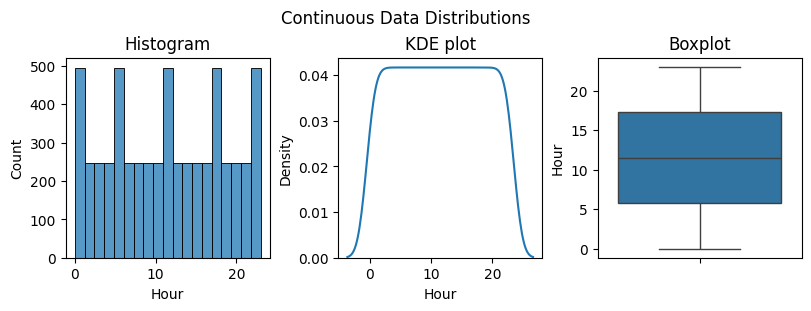

In [191]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'Hour')
print("Visual Analysis")
cont_vis_analysis(data,'Hour')

Non Visual Analysis
count     5952.00
min          1.00
max         31.00
mean        16.00
median      16.00
var         80.01
std          8.95
skew         0.00
kurt        -1.20
Name: Date, dtype: float64

Visual Analysis


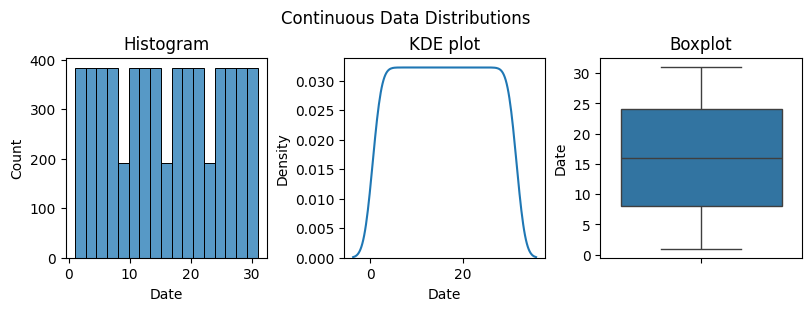

In [192]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'Date')
print("Visual Analysis")
cont_vis_analysis(data,'Date')

#### Kurtosis:

- Zero excess kurtosis (≈ 0): The distribution is mesokurtic, meaning its tails and peak are similar to those of a normal distribution.

- Positive excess kurtosis (> 0): Indicates a leptokurtic distribution, with a sharper peak and heavier tails.

- Negative excess kurtosis (< 0): Indicates a platykurtic distribution, with a flatter peak and lighter tails.

Non Visual Analysis
count     5952.00
min          5.00
max        180.00
mean        65.44
median      62.00
var       2002.50
std         44.75
skew         0.29
kurt        -1.11
Name: CarCount, dtype: float64

Visual Analysis


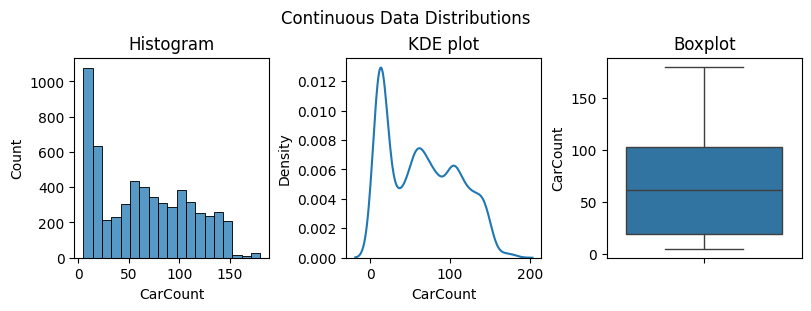

In [193]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'CarCount')
print("Visual Analysis")
cont_vis_analysis(data,'CarCount')

Non Visual Analysis
count     5952.00
min          0.00
max         50.00
mean        12.91
median      10.00
var        156.19
std         12.50
skew         0.95
kurt         0.09
Name: BusCount, dtype: float64

Visual Analysis


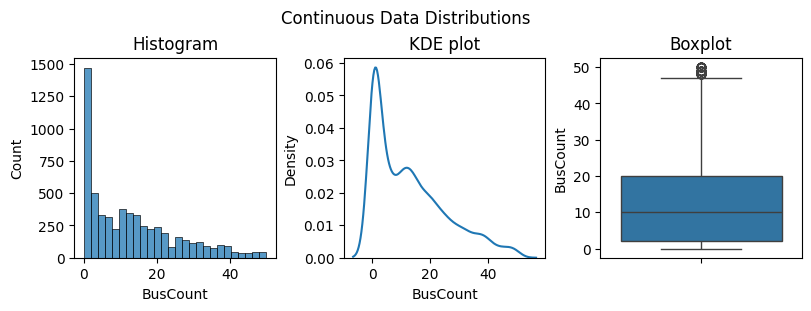

In [194]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'BusCount')
print("Visual Analysis")
cont_vis_analysis(data,'BusCount')

Non Visual Analysis
count     5952.00
min          0.00
max         70.00
mean        12.16
median       9.00
var        133.12
std         11.54
skew         1.44
kurt         2.89
Name: BikeCount, dtype: float64

Visual Analysis


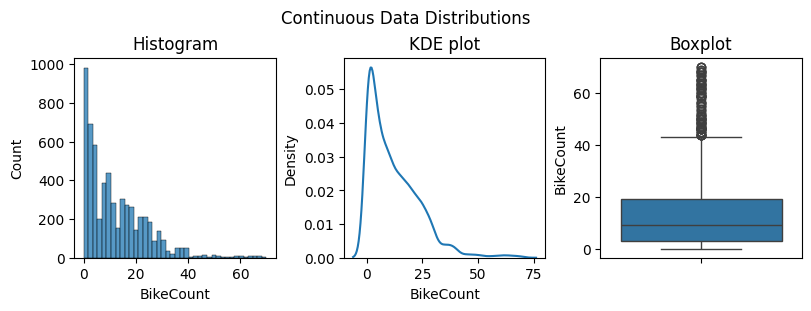

In [195]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'BikeCount')
print("Visual Analysis")
cont_vis_analysis(data,'BikeCount')

Non Visual Analysis
count     5952.00
min          0.00
max         60.00
mean        18.65
median      18.00
var        120.41
std         10.97
skew         0.32
kurt        -0.55
Name: TruckCount, dtype: float64

Visual Analysis


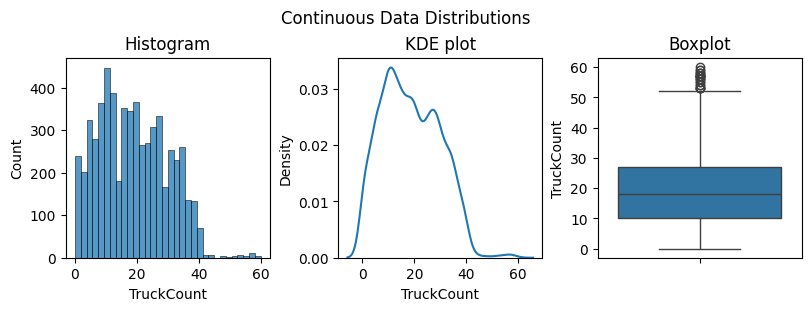

In [196]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'TruckCount')
print("Visual Analysis")
cont_vis_analysis(data,'TruckCount')

Non Visual Analysis
count     5952.00
min         21.00
max        279.00
mean       109.16
median     104.00
var       3135.59
std         56.00
skew         0.35
kurt        -0.92
Name: Total, dtype: float64

Visual Analysis


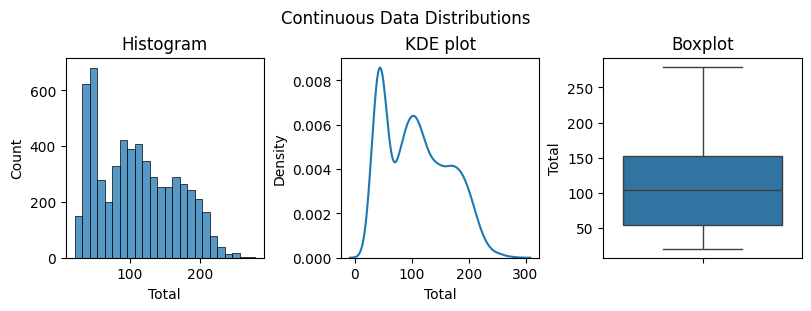

In [197]:
print("Non Visual Analysis")
cont_non_vis_analysis(data,'Total')
print("Visual Analysis")
cont_vis_analysis(data,'Total')

In [198]:
## Observations
# The 'Hour' and 'Date' variables show relatively more uniform distributions.
# All the vehicle count variables (CarCount, BikeCount, BusCount, TruckCount, and Total) exhibit right-skewed distributions with varying skewness.
# Box plot of BikeCount, BusCount, TruckCount shows outliers

#### Category or Discrete data analysis

In [199]:
def catg_disc_analysis(data,col):
  print("Value Counts for ",col)
  print(data[col].value_counts())
  print("Null values =",data[col].isna().sum())
  fig,axes=plt.subplots(1,2,figsize=(10,4),layout='constrained')
  fig.suptitle('Categorical / Discrete Num Data Distributions')

  axes[0].set_title('Bar Plot')
  sns.countplot(x=col,data=data,ax=axes[0])

  axes[1].set_title('Pie Chart')
  vc_data=data[col].value_counts()
  axes[1].pie(vc_data,labels=vc_data.index,autopct='%1.1f%%')
  fig.show()

Value Counts for  Day of the week
Day of the week
Tuesday      960
Wednesday    960
Thursday     960
Friday       768
Saturday     768
Sunday       768
Monday       768
Name: count, dtype: int64
Null values = 0


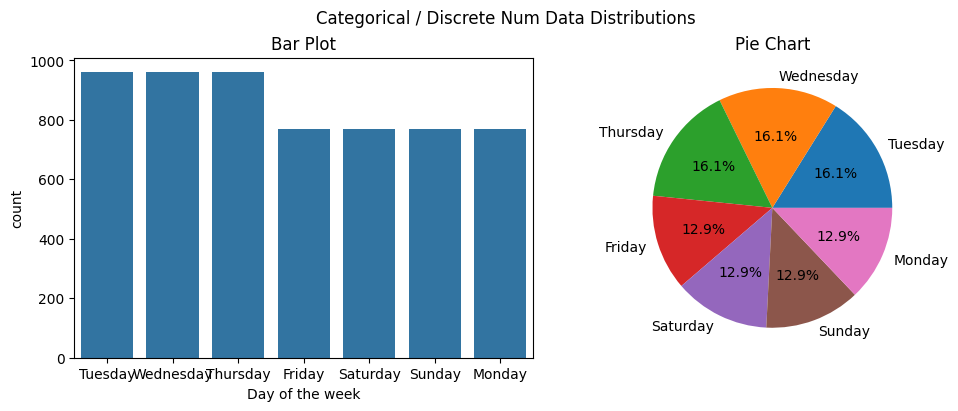

In [200]:
catg_disc_analysis(data,'Day of the week')

Value Counts for  Traffic Situation
Traffic Situation
normal    3610
heavy     1137
low        834
high       371
Name: count, dtype: int64
Null values = 0


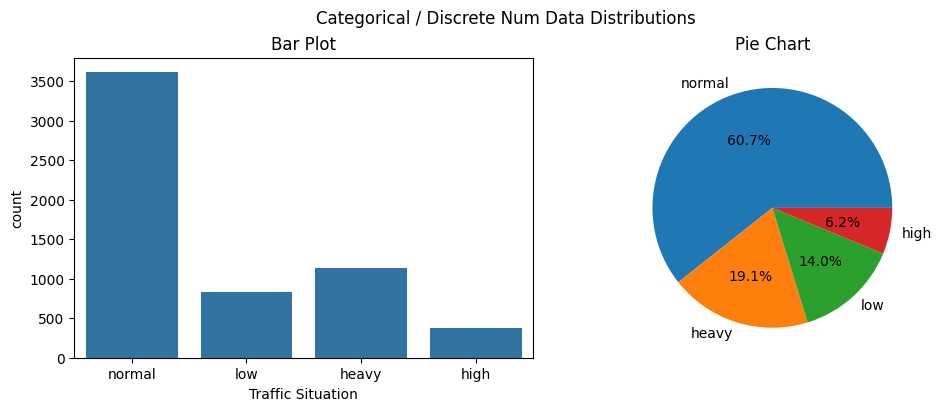

In [201]:
catg_disc_analysis(data,'Traffic Situation')

## Bivariate Analysis

In [202]:
data.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'Hour', 'Minute'],
      dtype='object')

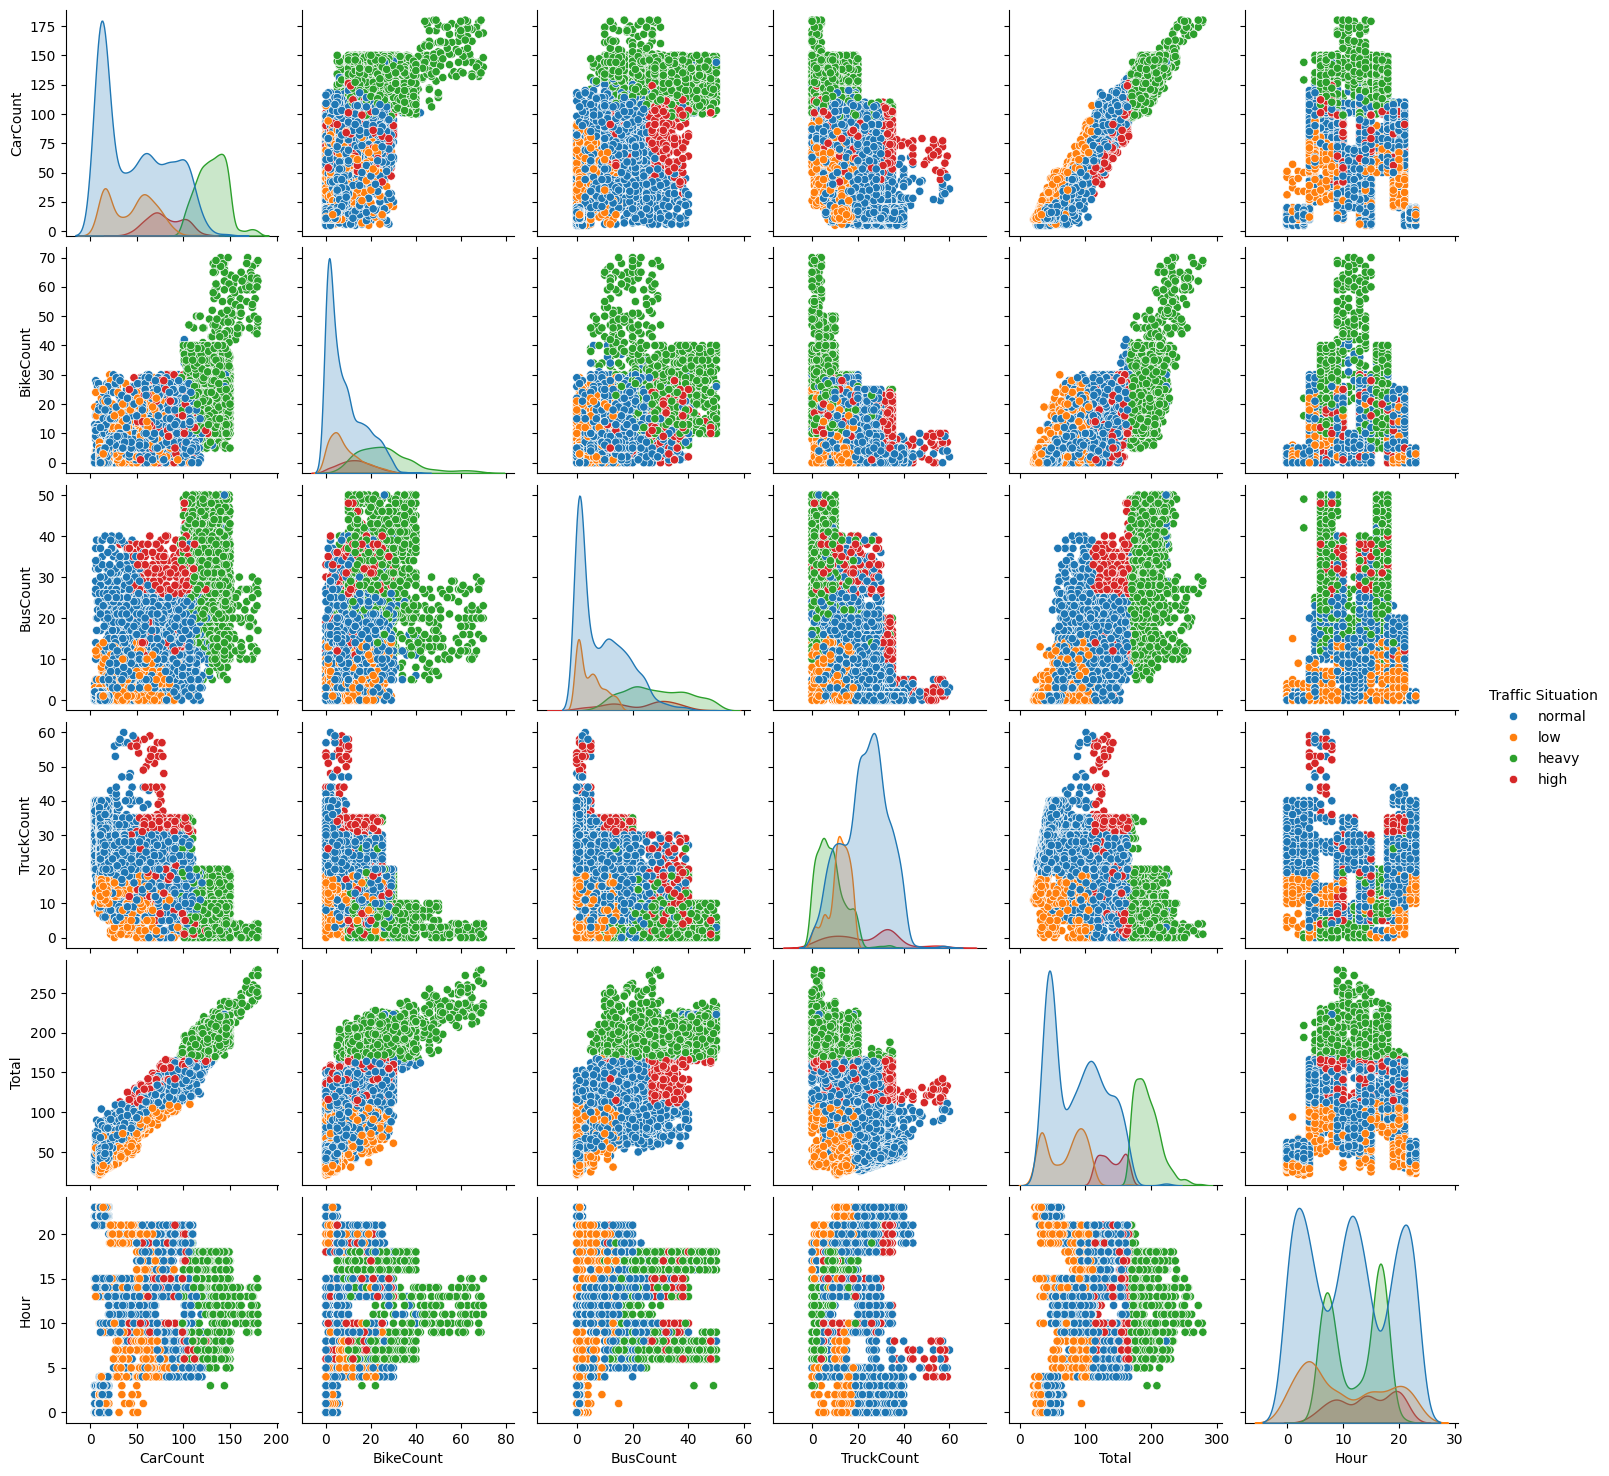

In [203]:
# Pair plot for a subset of numerical features
sns.pairplot(data[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Hour', 'Traffic Situation']], hue='Traffic Situation')
plt.show()

In [204]:
## Observations
# SCatterplot between CarCount vs Total is linear and remaining all are non-linear

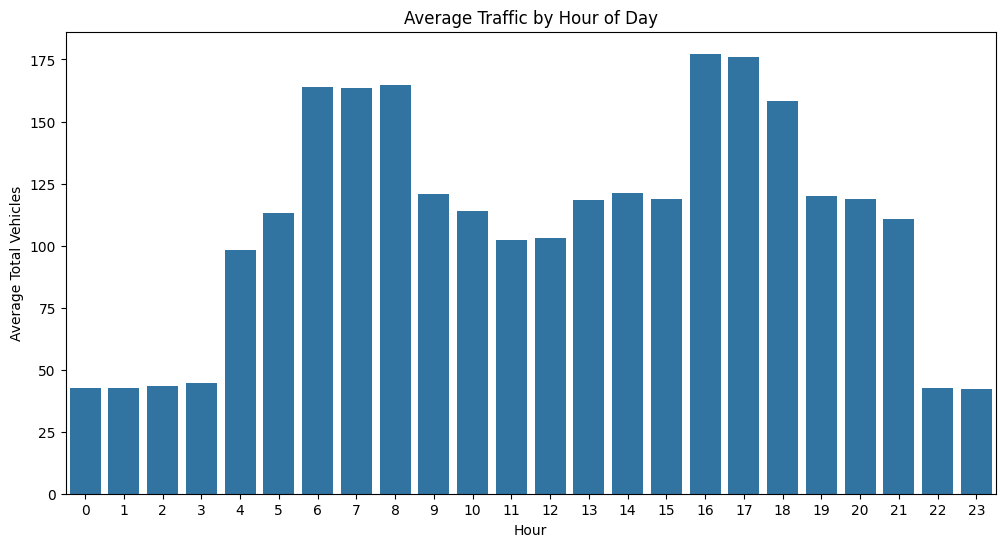

In [205]:
# Traffic by hour of day
plt.figure(figsize=(12, 6))
traffic_by_hour = data.groupby('Hour')['Total'].mean().reset_index()
sns.barplot(x='Hour', y='Total', data=traffic_by_hour)
plt.title('Average Traffic by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Total Vehicles')
plt.xticks(range(0, 24))
plt.show()

In [206]:
# cont - cat bivariate
def cont_cat_bivar_analysis(data,cat_col,num_col):
  plt.figure(figsize=(8,6))
  sns.boxplot(x=cat_col,y=num_col,data=data)

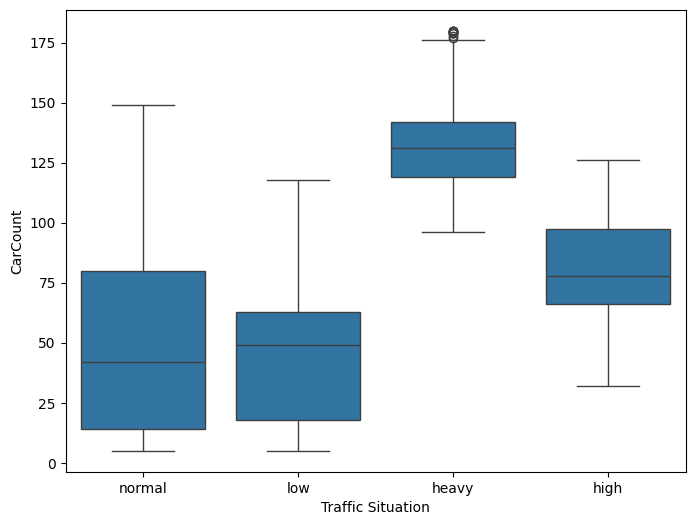

In [207]:
cont_cat_bivar_analysis(data,'Traffic Situation','CarCount')

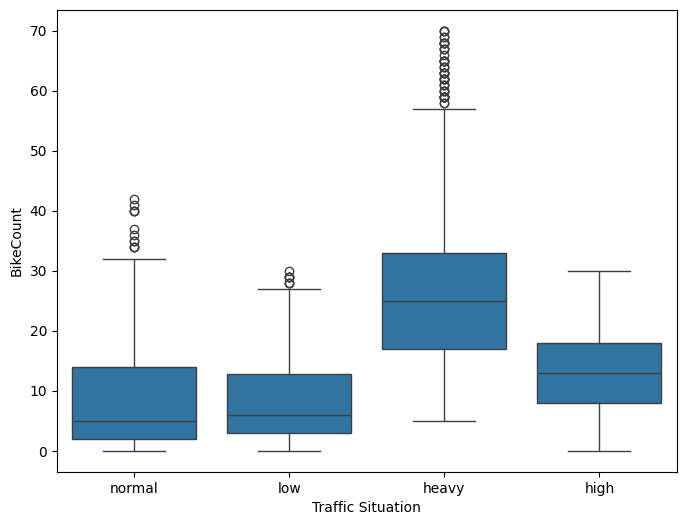

In [208]:
cont_cat_bivar_analysis(data,'Traffic Situation','BikeCount')

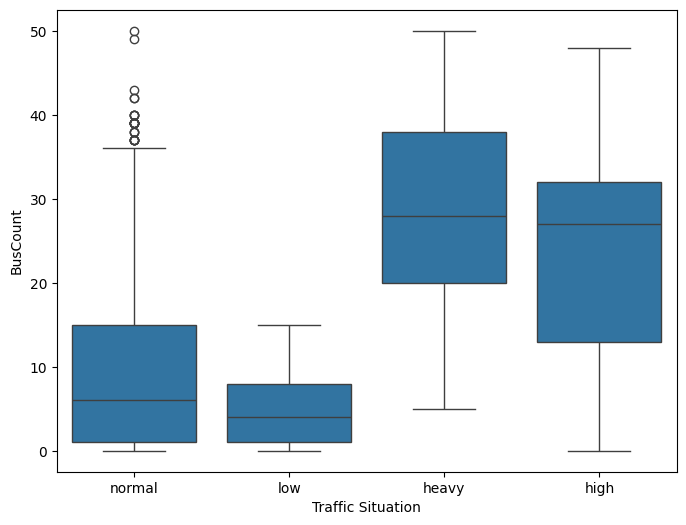

In [209]:
cont_cat_bivar_analysis(data,'Traffic Situation','BusCount')

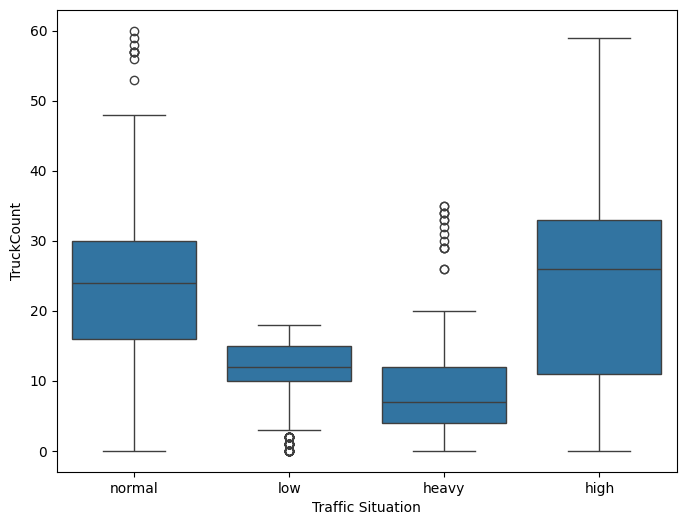

In [210]:
cont_cat_bivar_analysis(data,'Traffic Situation','TruckCount')

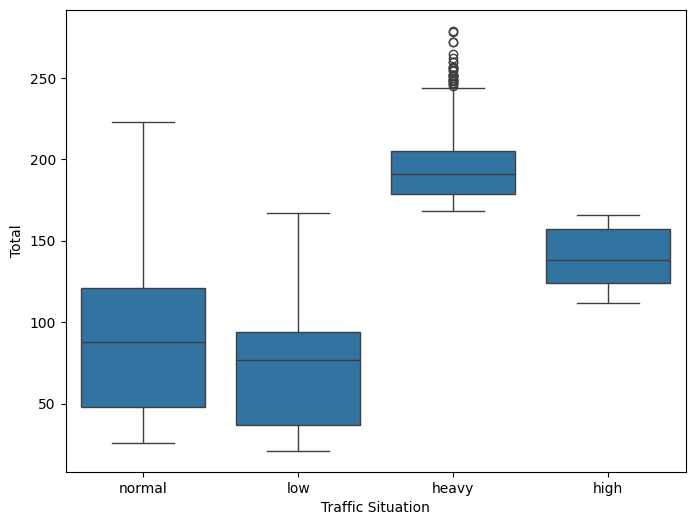

In [211]:
cont_cat_bivar_analysis(data,'Traffic Situation','Total')

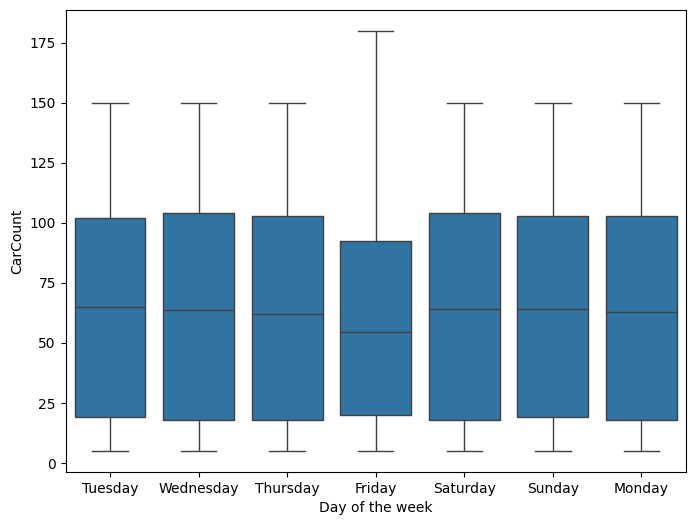

In [212]:
cont_cat_bivar_analysis(data,'Day of the week','CarCount')

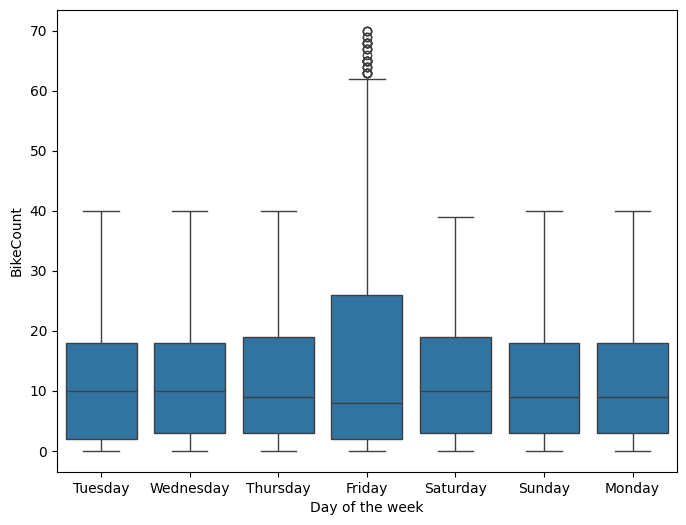

In [213]:
cont_cat_bivar_analysis(data,'Day of the week','BikeCount')

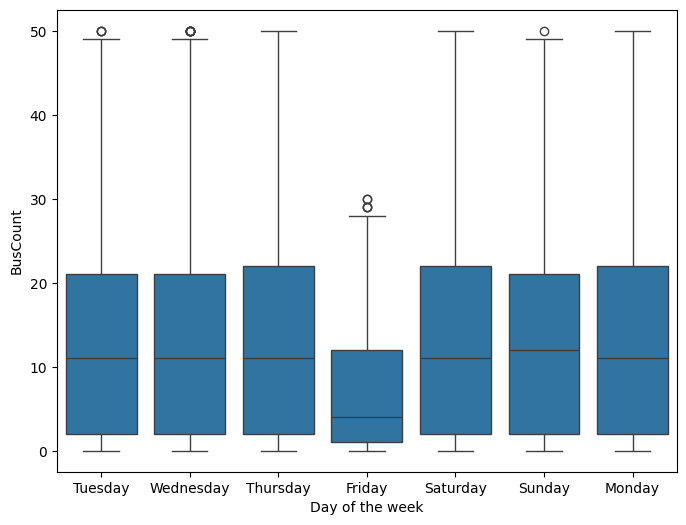

In [214]:
cont_cat_bivar_analysis(data,'Day of the week','BusCount')

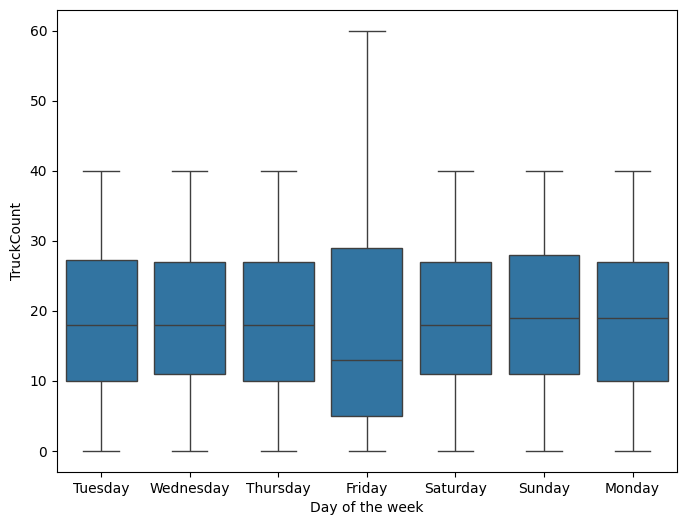

In [215]:
cont_cat_bivar_analysis(data,'Day of the week','TruckCount')

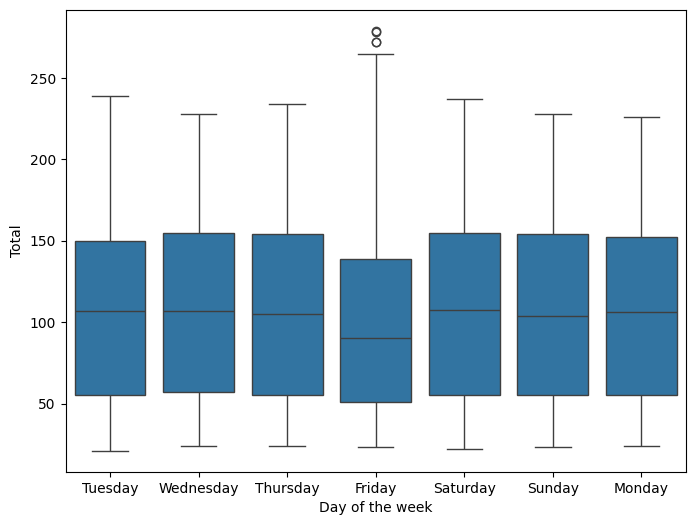

In [216]:
cont_cat_bivar_analysis(data,'Day of the week','Total')

In [217]:
## cat - cat bivariate
def cat_cat_bivar_analysis(data,col1,col2):
  ct_data=pd.crosstab(data[col1],data[col2])
  ct_data.plot(kind='bar')

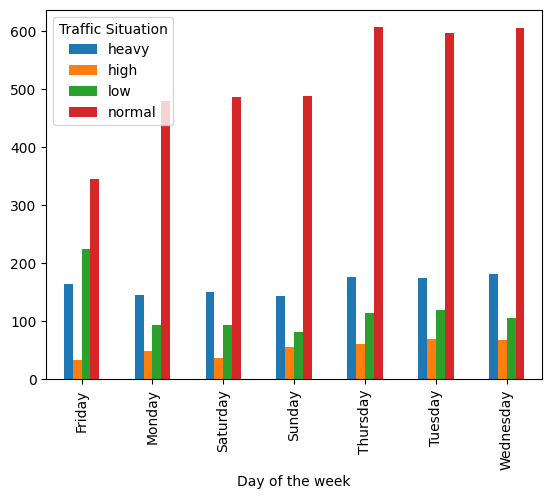

In [218]:
cat_cat_bivar_analysis(data,'Day of the week','Traffic Situation')

<Figure size 1400x700 with 0 Axes>

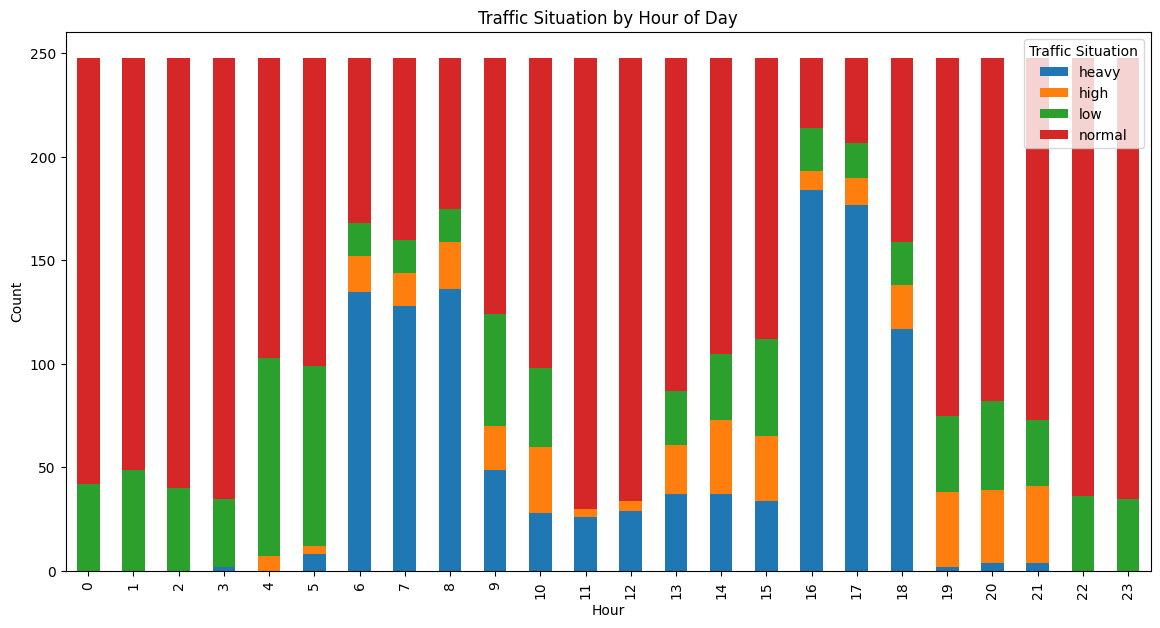

In [219]:
# Traffic situation by hour
plt.figure(figsize=(14, 7))
situation_by_hour = pd.crosstab(data['Hour'], data['Traffic Situation'])
situation_by_hour.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Traffic Situation by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Traffic Situation')
plt.show()

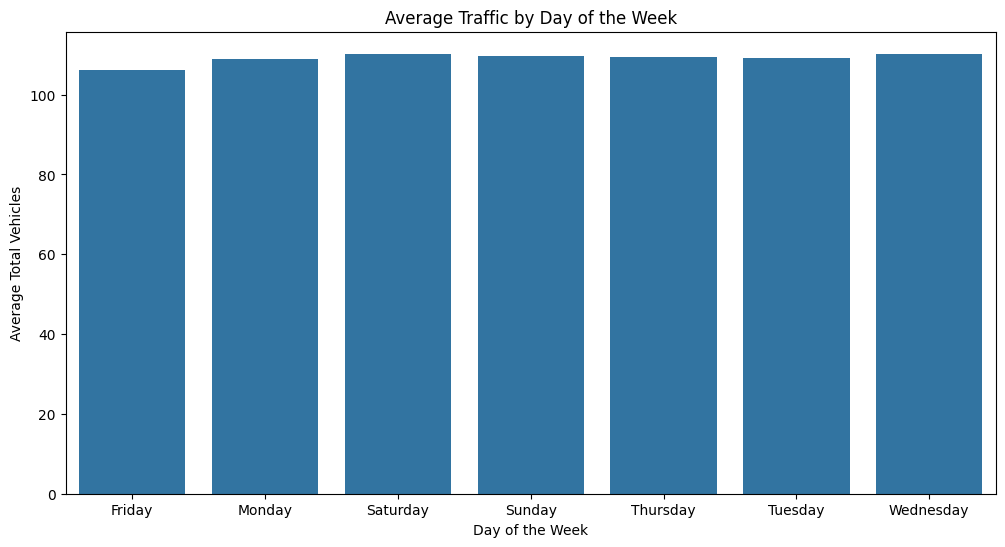

In [220]:
# Traffic by day of the week
plt.figure(figsize=(12, 6))
traffic_by_day = df.groupby('Day of the week')['Total'].mean().reset_index()
sns.barplot(x='Day of the week', y='Total', data=traffic_by_day)
plt.title('Average Traffic by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Vehicles')
plt.show()

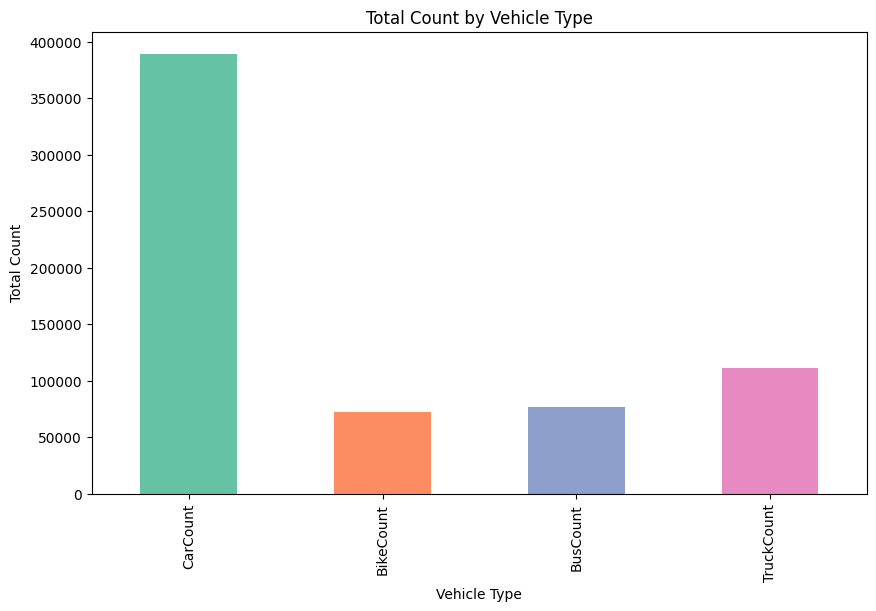

In [221]:
# Vehicle type distribution
vehicle_types = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
vehicle_data = df[vehicle_types].sum()

plt.figure(figsize=(10, 6))
vehicle_data.plot(kind='bar', color=sns.color_palette('Set2'))
plt.title('Total Count by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Count')
plt.show()

## Data Preprocessing

Non Visual Analysis (Log Transformed)
count     5952.00
min          0.00
max          4.26
mean         2.12
median       2.30
var          1.13
std          1.06
skew        -0.45
kurt        -0.75
Name: BikeCount_log, dtype: float64

count     5952.00
min          0.00
max          3.93
mean         2.07
median       2.40
var          1.46
std          1.21
skew        -0.40
kurt        -1.14
Name: BusCount_log, dtype: float64

count     5952.00
min          0.00
max          4.11
mean         2.75
median       2.94
var          0.62
std          0.79
skew        -1.33
kurt         1.92
Name: TruckCount_log, dtype: float64

Visual Analysis (Log Transformed)


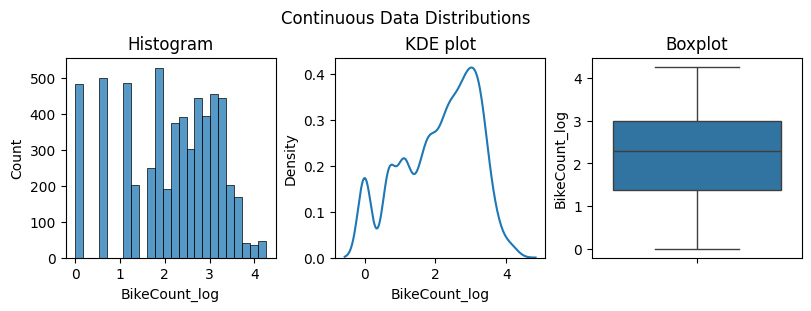

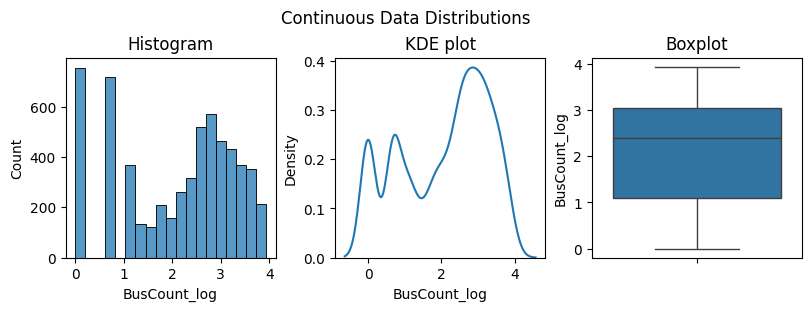

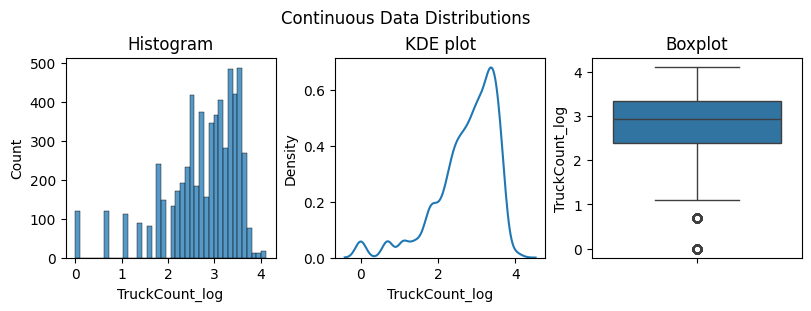

In [222]:
# Feature engineering
# convert BikeCount, BusCount, TruckCount columns in to log transform and plot cont_non_vis_analysis and cont_vis_analysis

for col in ['BikeCount', 'BusCount', 'TruckCount']:
  # Add a small constant to handle zero values before log transformation
  data[f'{col}_log'] = np.log(data[col]+1)

print("Non Visual Analysis (Log Transformed)")
cont_non_vis_analysis(data,'BikeCount_log')
cont_non_vis_analysis(data,'BusCount_log')
cont_non_vis_analysis(data,'TruckCount_log')

print("Visual Analysis (Log Transformed)")
cont_vis_analysis(data,'BikeCount_log')
cont_vis_analysis(data,'BusCount_log')
cont_vis_analysis(data,'TruckCount_log')


In [223]:
## Observations
# After applying a log transform, we see a reduction in outliers in the boxplot.

In [224]:
# Use Hour instead of Time for modeling
data['Time'] = data['Hour']

# Convert day of the week to numerical
day_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

if data['Day of the week'].dtype == 'object':
    data['Day of the week'] = data['Day of the week'].map(day_mapping)

# Drop Hour column as we've already used it to replace Time
data = data.drop('Hour', axis=1)
# Drop BikeCount, BusCount, TruckCount column instead of it we log transformed columns
data = data.drop(['BikeCount', 'BusCount', 'TruckCount'], axis=1)

In [225]:
data.head()

,Time,Date,Day of the week,CarCount,Total,Traffic Situation,Minute,BikeCount_log,BusCount_log,TruckCount_log
0,0,10,1,13,41,normal,0,1.098612,1.098612,3.218876
1,0,10,1,14,52,normal,15,0.693147,0.693147,3.610918
2,0,10,1,10,46,normal,30,1.098612,1.098612,3.496508
3,0,10,1,10,50,normal,45,1.098612,1.098612,3.610918
4,1,10,1,11,48,normal,0,1.098612,0.693147,3.555348


### Label encoding

In [226]:
# Encode the target variable
le = LabelEncoder()
data['Traffic Situation'] = le.fit_transform(data['Traffic Situation'])
print("Encoded traffic situations:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

# Display the preprocessed data
data.head()

Encoded traffic situations:
heavy: 0
high: 1
low: 2
normal: 3


,Time,Date,Day of the week,CarCount,Total,Traffic Situation,Minute,BikeCount_log,BusCount_log,TruckCount_log
0,0,10,1,13,41,3,0,1.098612,1.098612,3.218876
1,0,10,1,14,52,3,15,0.693147,0.693147,3.610918
2,0,10,1,10,46,3,30,1.098612,1.098612,3.496508
3,0,10,1,10,50,3,45,1.098612,1.098612,3.610918
4,1,10,1,11,48,3,0,1.098612,0.693147,3.555348


### Train_Test_Split

In [227]:
# Split data into features and target
X = data.drop('Traffic Situation', axis=1)
y = data['Traffic Situation']
X.shape,y.shape

((5952, 9), (5952,))

In [228]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4761, 9), (1191, 9), (4761,), (1191,))

In [229]:
X_train.head()

,Time,Date,Day of the week,CarCount,Total,Minute,BikeCount_log,BusCount_log,TruckCount_log
4328,2,24,1,19,55,0,1.098612,0.693147,3.526361
2644,13,6,0,14,70,0,2.995732,3.135494,2.772589
642,16,16,0,107,184,30,3.258097,3.663562,2.708050
5900,11,9,3,31,79,0,2.302585,2.484907,3.367296
2177,16,1,2,118,157,15,2.397895,2.639057,2.833213


### Standard Scaling

In [230]:
# Apply Standard Scaling to numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()

,Time,Date,Day of the week,CarCount,Total,Minute,BikeCount_log,BusCount_log,TruckCount_log
0,-1.375000,0.886270,-0.972769,-1.040253,-0.968588,-1.333843,-0.966774,-1.145916,0.995296
1,0.214908,-1.122871,-1.487535,-1.151855,-0.700989,-1.333843,0.818239,0.883203,0.040032
2,0.648520,-0.006682,-1.487535,0.923939,1.332766,0.450987,1.065099,1.321925,-0.041759
3,-0.074166,-0.788014,0.056764,-0.772409,-0.540430,-1.333843,0.166052,0.342690,0.793712
4,0.648520,-1.680966,-0.458002,1.169464,0.851087,-0.441428,0.255730,0.470760,0.116862


In [231]:
y_train.head()

,Traffic Situation
4328,3
2644,3
642,0
5900,3
2177,3


## Build the ANN Model

In [232]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader

In [233]:
from torch.utils.data import Dataset

class TrafficData(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)  # Convert DataFrame to array
        self.y = torch.tensor(y.values, dtype=torch.long)     # Classification target needs Long type

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [234]:
train_data=TrafficData(X_train_scaled,y_train)
test_data=TrafficData(X_test_scaled,y_test)

In [235]:
len(train_data)

4761

In [236]:
len(test_data)

1191

In [237]:
train_data[0]

(tensor([-1.3750,  0.8863, -0.9728, -1.0403, -0.9686, -1.3338, -0.9668, -1.1459,
          0.9953]),
 tensor(3))

In [238]:
train_data.__getitem__(0)

(tensor([-1.3750,  0.8863, -0.9728, -1.0403, -0.9686, -1.3338, -0.9668, -1.1459,
          0.9953]),
 tensor(3))

In [239]:
from torch.utils.data import DataLoader
# DataLoader helps in creating batches in parallel
train_loader=DataLoader(train_data,batch_size=128,shuffle=True)
test_loader=DataLoader(test_data,batch_size=256,shuffle=True)

In [240]:
len(train_loader),len(test_loader)

(38, 5)

In [241]:
# Why batch size can be larger in test data ?
# We don't update the model weights using test data.
# Hence there is no need of computing gradients.
# The memory saved on computing and storing gradients can be utilised to store more testing datapoints
# More datapoints means higher batch size for test data

In [242]:
import torch.nn as nn

# --- ANN Model for Multi-Class Classification ---
class ANNClassifier(nn.Module):

    def __init__(self, n_features=9, n_classes=4):
        # Initialize the parent class (nn.Module)
        super().__init__()

        # Define network layers
        # First hidden layer: maps input features to 32 neurons
        self.layer1 = nn.Linear(n_features, 32)

        # Second hidden layer: maps 32 neurons to 16 neurons
        self.layer2 = nn.Linear(32, 16)

        # Output layer: maps 16 neurons to number of classes
        # No activation function here - outputs raw logits
        self.output = nn.Linear(16, n_classes)

        # ReLU activation function (Rectified Linear Unit)
        self.relu = nn.ReLU()

    def forward(self, X):
        # First layer: Linear transformation followed by ReLU activation
        # Shape: (batch_size, n_features) -> (batch_size, 32)
        x = self.relu(self.layer1(X))

        # Second layer: Linear transformation followed by ReLU activation
        # Shape: (batch_size, 32) -> (batch_size, 16)
        x = self.relu(self.layer2(x))

        # Output layer: Linear transformation to get class logits
        # Shape: (batch_size, 16) -> (batch_size, n_classes)
        # Note: No softmax here! CrossEntropyLoss expects raw logits
        return self.output(x)


In [243]:
model = ANNClassifier(n_features=X_train.shape[1], n_classes=4)

In [244]:
import torch.optim as optim

In [245]:
loss_function=nn.CrossEntropyLoss() # for Classification
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [246]:
# --- Check Shapes ---
for batch_X, batch_y in train_loader:
    print(batch_X.shape, batch_y.shape)
    break

torch.Size([128, 9]) torch.Size([128])


In [247]:
# train loop
n_epochs=40
epoch_loss=[]
for epoch in range(n_epochs):
  model.train()
  train_loss=[]
  for batch_x,batch_y in train_loader:
    outputs=model(batch_x)
    loss=loss_function(outputs,batch_y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    train_loss.append(loss.item())

  avg_train_loss=sum(train_loss)/len(train_loss)
  print(f'Avg train loss after {epoch+1} epochs = {avg_train_loss}')
  epoch_loss.append(avg_train_loss)


Avg train loss after 1 epochs = 1.2874720755376314
Avg train loss after 2 epochs = 1.0192652125107615
Avg train loss after 3 epochs = 0.8165540757932161
Avg train loss after 4 epochs = 0.6886814997384423
Avg train loss after 5 epochs = 0.6041008030113421
Avg train loss after 6 epochs = 0.5327148711995074
Avg train loss after 7 epochs = 0.4835849686672813
Avg train loss after 8 epochs = 0.44738134820210307
Avg train loss after 9 epochs = 0.41649618666422994
Avg train loss after 10 epochs = 0.38858073832173096
Avg train loss after 11 epochs = 0.3695607851994665
Avg train loss after 12 epochs = 0.3544484478862662
Avg train loss after 13 epochs = 0.3276156755654435
Avg train loss after 14 epochs = 0.315593872415392
Avg train loss after 15 epochs = 0.2982058881929046
Avg train loss after 16 epochs = 0.28053932087986094
Avg train loss after 17 epochs = 0.269258892849872
Avg train loss after 18 epochs = 0.2564064370174157
Avg train loss after 19 epochs = 0.24452135398199684
Avg train loss aft

<Axes: >

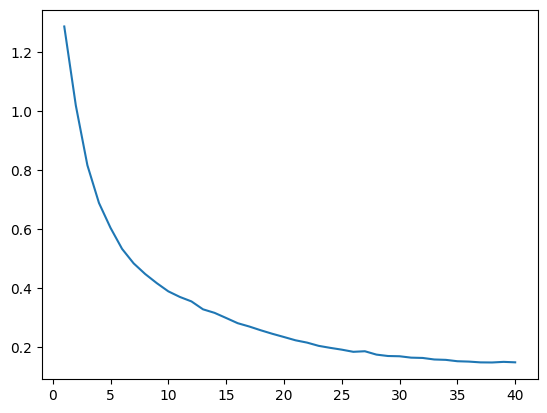

In [248]:
import seaborn as sns
sns.lineplot(x=range(1,len(epoch_loss)+1),y=epoch_loss)

In [249]:
model.eval()
test_loss=[]
with torch.no_grad():
  for batch_x,batch_y in test_loader:
    outputs=model(batch_x)
    loss=loss_function(outputs,batch_y)
    test_loss.append(loss.item())

In [250]:
avg_test_loss=sum(test_loss)/len(test_loss)
print(f'Avg test loss = {avg_test_loss}')

Avg test loss = 0.13970473110675813


In [251]:
# Model evaluation using Classification Metrics

y_preds=[]
y_acts=[]

model.eval()
with torch.no_grad():
  for batch_x,batch_y in test_loader:
    outputs=model(batch_x)
    probs=torch.softmax(outputs,dim=1)
    y_pred=torch.argmax(probs,dim=1)
    # convert y_pred to CPU and numpy array
    y_pred=y_pred.cpu().numpy()
    y_preds.extend(y_pred)
    y_acts.extend(batch_y.cpu().numpy())

In [252]:
len(y_preds),len(y_acts)

(1191, 1191)

In [253]:
from sklearn.metrics import classification_report

print(classification_report(y_acts,y_preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       216
           1       0.88      0.69      0.77        81
           2       0.93      0.94      0.94       146
           3       0.96      0.97      0.96       748

    accuracy                           0.95      1191
   macro avg       0.93      0.89      0.91      1191
weighted avg       0.95      0.95      0.95      1191

